#### Load IMDB Dataset (TEXT + LABELS)

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Load dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Testing samples: 25000


#### Convert Numbers Back to Text

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

X_train_text = [decode_review(review) for review in X_train]
X_test_text = [decode_review(review) for review in X_test]

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Create a DataFrame

In [3]:
import pandas as pd

df_train = pd.DataFrame({
    "review": X_train_text,
    "sentiment": y_train
})

df_train["sentiment"] = df_train["sentiment"].map({1: "positive", 0: "negative"})
df_train.head()

,review,sentiment
0,? this film was just brilliant casting locatio...,positive
1,? big hair big boobs bad music and a giant saf...,negative
2,? this has to be one of the worst films of the...,negative
3,? the ? ? at storytelling the traditional sort...,positive
4,? worst mistake of my life br br i picked this...,negative


#### Save as CSV for GitHub

In [4]:
df_train.to_csv("imdb_reviews.csv", index=False)

#### Install Required Libraries

In [5]:
!pip install nltk scikit-learn

#### Import Libraries

In [6]:
import pandas as pd
import numpy as np

import nltk
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Load Dataset

In [7]:
df = pd.read_csv("imdb_reviews.csv")
df.head()

,review,sentiment
0,? this film was just brilliant casting locatio...,positive
1,? big hair big boobs bad music and a giant saf...,negative
2,? this has to be one of the worst films of the...,negative
3,? the ? ? at storytelling the traditional sort...,positive
4,? worst mistake of my life br br i picked this...,negative


#### Text Cleaning

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

df['clean_review'] = df['review'].apply(clean_text)

#### Train-Test Split

In [9]:
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### TF-IDF Vectorization

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#### Model Training

In [11]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

#### Evaluation + Metrics

In [12]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.8784
              precision    recall  f1-score   support

    negative       0.89      0.86      0.87      2437
    positive       0.87      0.89      0.88      2563

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



#### Confusion Matrix

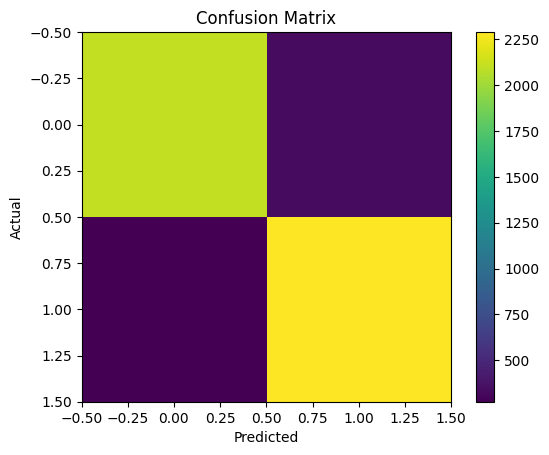

In [13]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

#### Save Metrics

In [14]:
with open("metrics.txt", "w") as f:
    f.write(f"Accuracy: {accuracy}\n")

## Insights Summary

- TF-IDF with Logistic Regression achieved good baseline accuracy
- Model performs better on negative reviews
- Cleaned text significantly improved results
- Class distribution is balanced
- Logistic Regression is fast and interpretable
